In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Task1:Data Cleaning

In [2]:
df = pd.read_csv('DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv',delimiter=';')
df.isnull().sum()
ind = (df[df.duplicated()]).index
df = df.drop(ind)
def OutlierTreat(df):
    for col in df.select_dtypes(exclude='object'):
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr = q3-q1
        ub = q3+(1.5*iqr)
        lb = q1-(1.5*iqr)
        df[col] = df[col].clip(lower=lb,upper=Ub) 
    return df



# The data is loaded in df using pandas and the duplicated values are removed from data and outlier analysis is perfromed using IQR and clip



df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


# Task2:Understanding Absenteeism Patterns

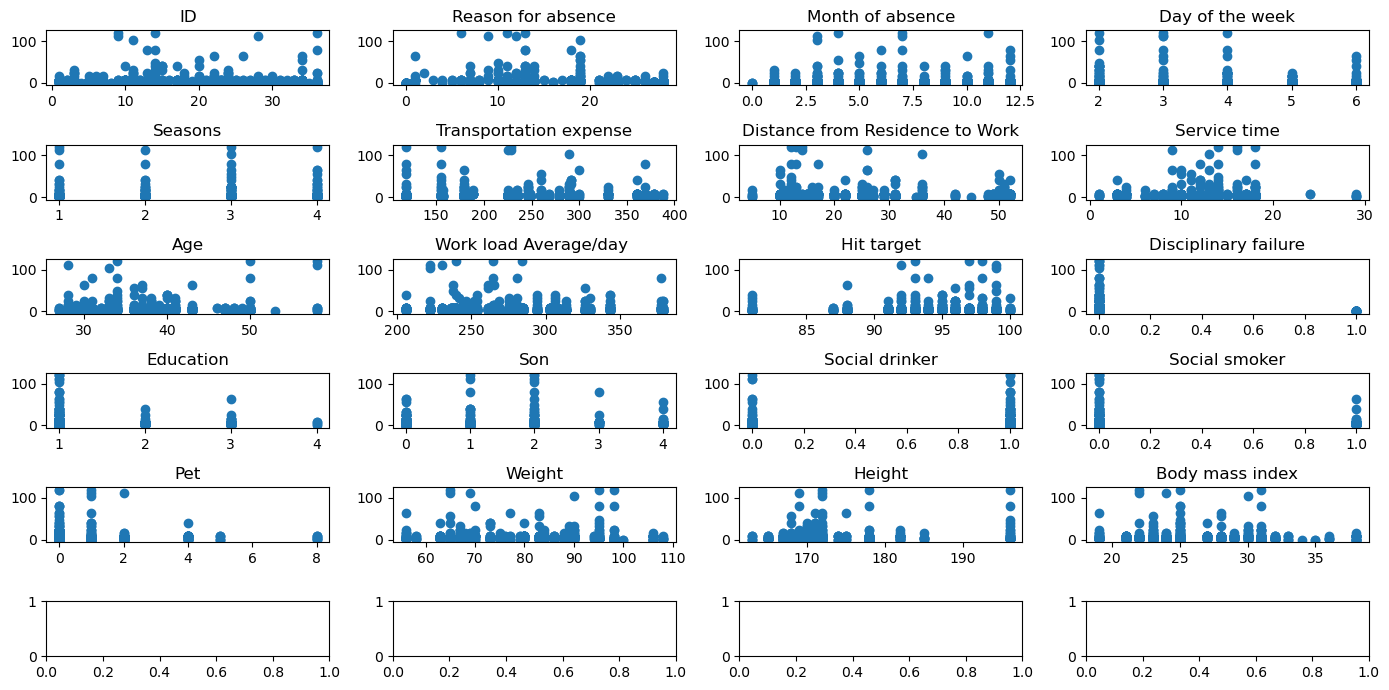

In [9]:
# 
df1 = df.loc[:,'Absenteeism time in hours']
df2 = df.loc[:,df.columns!='Absenteeism time in hours']
# df1= df.loc[:,df.columns!='Outcome']
# new_income_df = df1.select_dtypes(exclude='object')
numerical_col = df2.columns
n_cols=4
num_rows = int(len(numerical_col)/n_cols)+1
fig,axs = plt.subplots(num_rows,n_cols,tight_layout=True,figsize=(14,7))
for col,ax in zip(numerical_col,axs.flatten()[:len(numerical_col)]):
  ax.scatter(df2[col],df1)
  ax.set_title(col)
plt.show()


# The relationship between each column and target coulumn is displayed using scatter plot between independent and dependent feartues

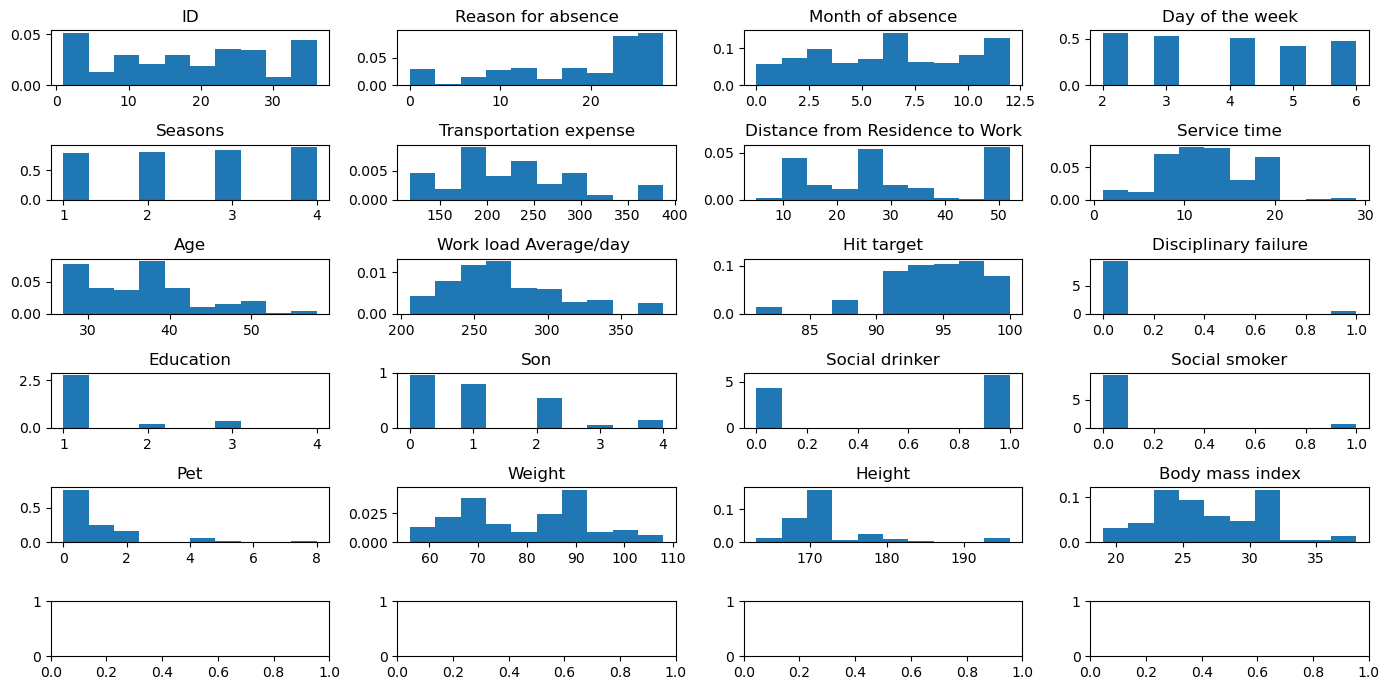

In [10]:
df1 = df.loc[:,'Absenteeism time in hours']
df2 = df.loc[:,df.columns!='Absenteeism time in hours']
# df1= df.loc[:,df.columns!='Outcome']
# new_income_df = df1.select_dtypes(exclude='object')
numerical_col = df2.columns
n_cols=4
num_rows = int(len(numerical_col)/n_cols)+1
fig,axs = plt.subplots(num_rows,n_cols,tight_layout=True,figsize=(14,7))
for col,ax in zip(numerical_col,axs.flatten()[:len(numerical_col)]):
  ax.hist(df2[col],density=True)
  ax.set_title(col)
plt.show()

# As are numeric column the data distribution of each coulumn is visualized using histogram workload is right skewed

# Task3 : Analyzing Reasons for Absenteeism

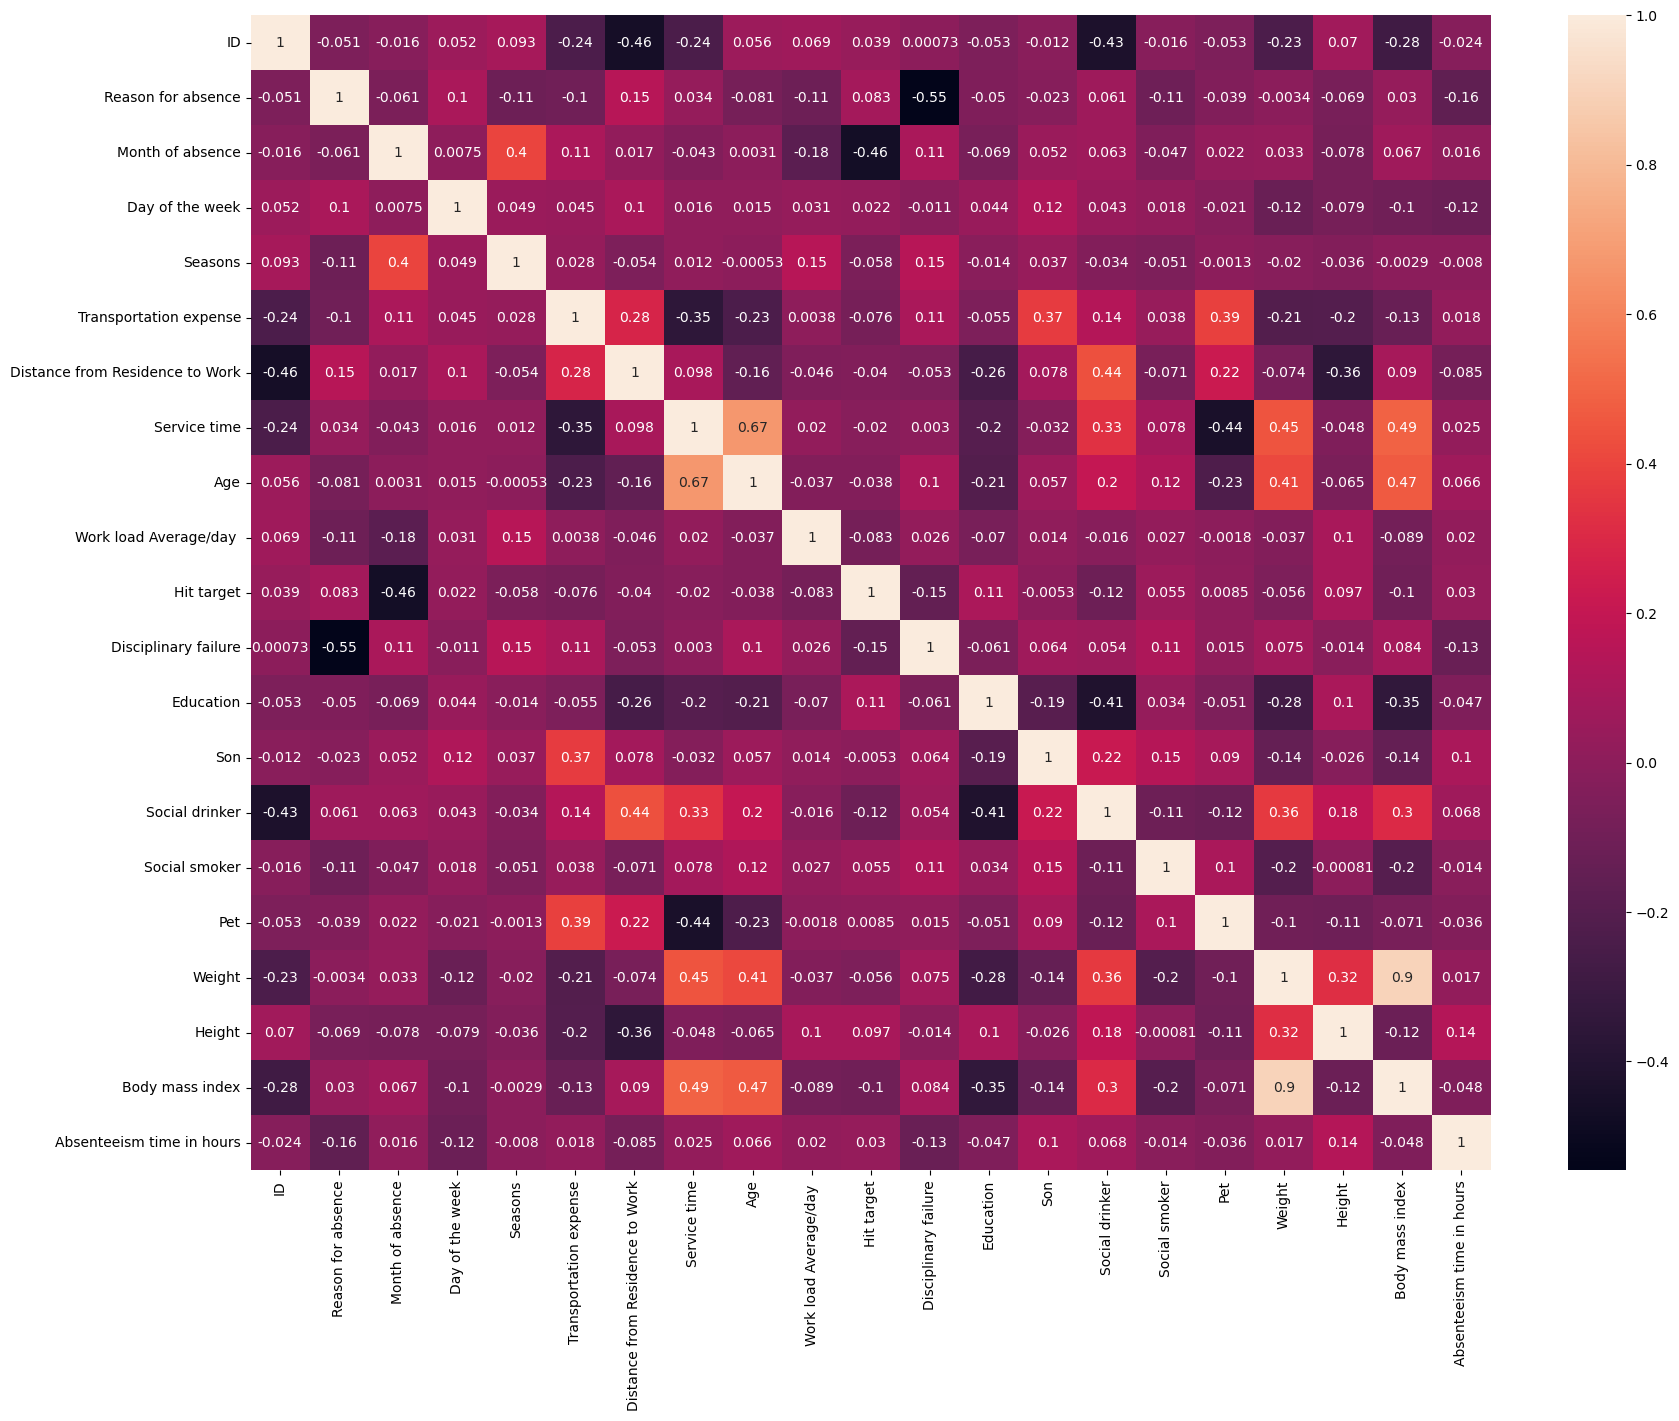

Absenteeism time in hours          1.000000
Height                             0.140121
Son                                0.102455
Social drinker                     0.067850
Age                                0.065822
Hit target                         0.029886
Service time                       0.025472
Work load Average/day              0.020150
Transportation expense             0.018275
Weight                             0.016632
Month of absence                   0.015598
Seasons                           -0.008040
Social smoker                     -0.013609
ID                                -0.023517
Pet                               -0.036405
Education                         -0.047262
Body mass index                   -0.048388
Distance from Residence to Work   -0.084683
Day of the week                   -0.121380
Disciplinary failure              -0.128732
Reason for absence                -0.162592
Name: Absenteeism time in hours, dtype: float64


In [11]:
plt.figure(figsize=(20,15))
sb.heatmap(df.corr(),annot=True)
plt.show()
print(df.corr()['Absenteeism time in hours'].sort_values(ascending=False))

# The reason of absenteeism is ananlyzed using heat map the correlation between features and target 
# The reason of absence has hight negative correlation correlation in postive correlation heigh s highest

# Task-4: Predicting Absenteeism Duration 

In [12]:

mm = preprocessing.MinMaxScaler()
new_df1 = pd.DataFrame(mm.fit_transform(df),columns = df.columns)
new_df1
X= new_df1.loc[:,['Reason for absence','Distance from Residence to Work','Disciplinary failure']]
Y=new_df1[['Absenteeism time in hours']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=41)
LG=LinearRegression()
LG.fit(X_train,Y_train)
LG.intercept_
LG.coef_
predict=LG.predict(X_test)

import math
MSE = mean_squared_error(predict,Y_test)
RMSE = math.sqrt(mean_squared_error(predict,Y_test))
MAE = mean_absolute_error(predict,Y_test)
R2 = r2_score(predict,Y_test)
print('MSE of model :',MSE)
print('RMSE of model :',RMSE)
print('MAE of model :',MAE)
print('R2 of model :',R2)


# The above is multiple linear regression model in the i have considered three features 'Reason for absence','Distance from Residence to Work','Disciplinary failure'
# from multicolinearity the model as low mse,rmse,mae but due low r2 score the is less effiecient in predictions but if compare other features it even more worse

MSE of model : 0.01697432543850727
RMSE of model : 0.13028555345281867
MAE of model : 0.047934048383348325
R2 of model : -17.079446878105966


In [13]:
new_df1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.285714,0.928571,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,...,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,1.000000,0.000000,0.583333,0.25,0.000000,0.000000,0.170213,0.607143,0.741935,0.194471,...,1.0,0.000000,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000
2,0.057143,0.821429,0.583333,0.50,0.000000,0.225926,0.978723,0.607143,0.354839,0.194471,...,0.0,0.000000,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667
3,0.171429,0.250000,0.583333,0.75,0.000000,0.596296,0.000000,0.464286,0.387097,0.194471,...,0.0,0.000000,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333
4,0.285714,0.821429,0.583333,0.75,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,...,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.285714,0.500000,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.339296,...,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.066667
702,0.000000,0.392857,0.583333,0.25,0.000000,0.433333,0.127660,0.464286,0.322581,0.339296,...,0.0,0.666667,0.25,0.0,0.0,0.125,0.615385,0.272727,0.526316,0.033333
703,0.085714,0.000000,0.000000,0.25,0.000000,0.000000,0.191489,0.428571,0.419355,0.377540,...,0.0,0.000000,0.25,1.0,0.0,1.000,0.807692,0.212121,0.789474,0.000000
704,0.200000,0.000000,0.000000,0.50,0.333333,0.418519,0.638298,0.464286,0.387097,0.377540,...,0.0,0.000000,0.50,1.0,0.0,0.250,0.846154,0.212121,0.842105,0.000000


In [28]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import numpy as np
df.insert(21,'absent%',value=np.nan)
df.loc[df['Absenteeism time in hours']<10,'absent%']=1
df.loc[df['Absenteeism time in hours']>=10,'absent%']=0
mm = preprocessing.MinMaxScaler()
new_df = pd.DataFrame(mm.fit_transform(df),columns = df.columns)
new_df
X= new_df.loc[:,['Reason for absence','Distance from Residence to Work','Disciplinary failure']]
Y=df[['absent%']]
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=41)
LG=LogisticRegression().fit(X_train,Y_train)
from sklearn.metrics import accuracy_score
pred=LG.predict(X_test)
print(accuracy_score(pred,y_test))


print(confusion_matrix(y_test,pred))
tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()
print(tn,fp,fn,tp)
print(recall_score(y_test,pred))
print(precision_score(y_test,pred))
print(f1_score(y_test,pred))

0.9150943396226415
[[  0  18]
 [  0 194]]
0 18 0 194
1.0
0.9150943396226415
0.9556650246305419


In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train)
prediction=KNN.predict(X_test)
print(accuracy_score(prediction,y_test))
print(confusion_matrix(prediction,y_test))
print(f1_score(prediction,y_test))

0.8867924528301887
[[  4  10]
 [ 14 184]]
0.9387755102040817


# task2

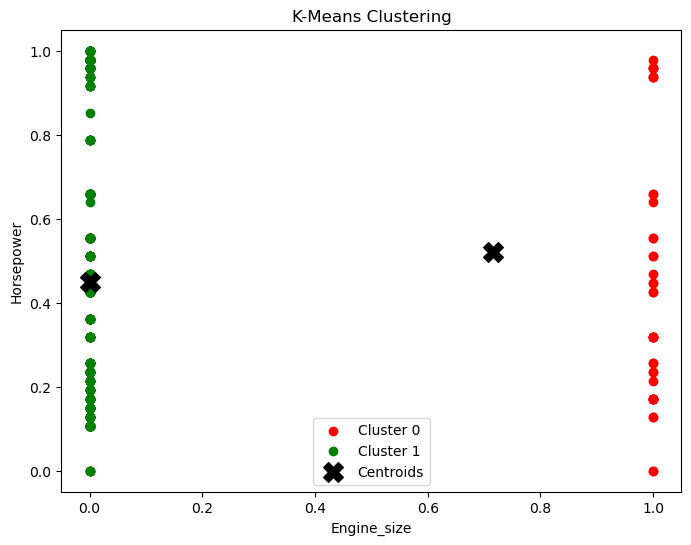

In [43]:
from sklearn.cluster import KMeans
data=new_df[['Reason for absence','Distance from Residence to Work','Disciplinary failure']]
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
colors = ['red', 'green']

for i in range(2):
    plt.scatter(data[data['Cluster'] == i]['Disciplinary failure'], 
                data[data['Cluster'] == i]['Distance from Residence to Work'], 
                color=colors[i], label=f'Cluster {i}')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Engine_size')
plt.ylabel('Horsepower')
plt.legend()
plt.show()